### Задача 5. Классификация новостных статей
Набор данных: [20 Newsgroups](https://scikit-learn.org/stable/datasets/real_world.html#newsgroups-dataset)

Logistic Regression - Accuracy: 0.9353
Logistic Regression - Confusion Matrix:
[[301   5   6   7]
 [  3 371   2  13]
 [  5   7 380   5]
 [ 10  30   4 350]]

SVM - Accuracy: 0.5223
SVM - Confusion Matrix:
[[127   3   1 188]
 [  1 130   0 258]
 [  1   3 144 249]
 [  0  10   2 382]]

Random Forest - Accuracy: 0.9053
Random Forest - Confusion Matrix:
[[277  18  19   5]
 [  4 363  14   8]
 [  2  19 376   0]
 [  8  33  12 341]]

Gradient Boosting - Accuracy: 0.9079
Gradient Boosting - Confusion Matrix:
[[280   9  16  14]
 [  4 356  16  13]
 [  0  15 378   4]
 [  6  25  16 347]]

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   9.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   9.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   9.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   8.8s
[CV] END .........................

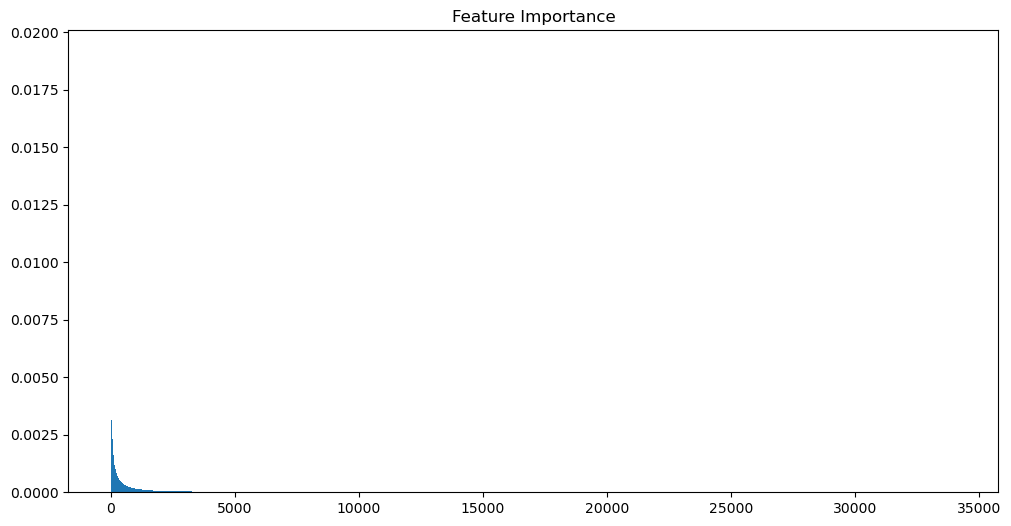

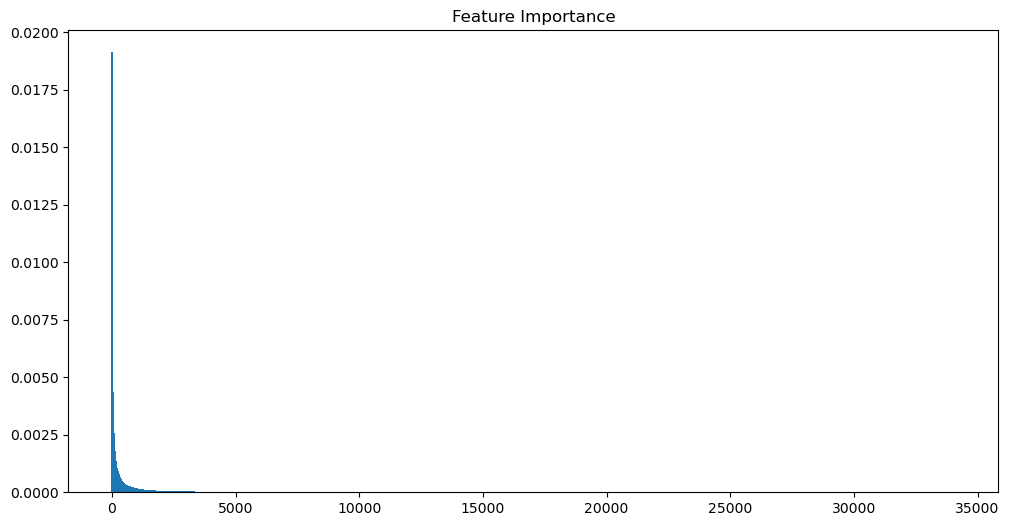

In [1]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import numpy as np

selected_categories = ['alt.atheism', 'comp.graphics', 'sci.space', 'rec.sport.baseball']

train_data = fetch_20newsgroups(subset='train', categories=selected_categories)
test_data = fetch_20newsgroups(subset='test', categories=selected_categories)

train_df = pd.DataFrame({'content': train_data.data, 'label': train_data.target})
test_df = pd.DataFrame({'content': test_data.data, 'label': test_data.target})

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_vec = vectorizer.fit_transform(train_df['content'])
X_test_vec = vectorizer.transform(test_df['content'])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)

X_train_scaled = scaler.fit_transform(X_train_vec)
X_test_scaled = scaler.transform(X_test_vec)

y_train = train_df['label']
y_test = test_df['label']

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

from sklearn.svm import SVC
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)

from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_scaled, y_train)

from sklearn.ensemble import GradientBoostingClassifier
grad_boost_model = GradientBoostingClassifier()
grad_boost_model.fit(X_train_scaled, y_train)

classifier_models = {
    "Logistic Regression": logistic_model,
    "SVM": svm_model,
    "Random Forest": random_forest_model,
    "Gradient Boosting": grad_boost_model
}

from sklearn.metrics import accuracy_score, confusion_matrix
for model_name, model in classifier_models.items():
    predicted_labels = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predicted_labels)
    confusion_mat = confusion_matrix(y_test, predicted_labels)
    print(f"{model_name} - Accuracy: {accuracy:.4f}")
    print(f"{model_name} - Confusion Matrix:\n{confusion_mat}\n")

from sklearn.model_selection import GridSearchCV

svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

grid_search = GridSearchCV(SVC(), svm_param_grid, refit=True, verbose=2)
grid_search.fit(X_train_scaled, y_train)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

from sklearn.model_selection import RandomizedSearchCV

svm_param_dist = {
    'C': np.logspace(-3, 2, 6),
    'gamma': np.logspace(-3, 2, 6),
    'kernel': ['rbf', 'poly', 'sigmoid']
}

random_search = RandomizedSearchCV(SVC(), svm_param_dist, n_iter=50, refit=True, verbose=2, random_state=42)
random_search.fit(X_train_scaled, y_train)
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

import matplotlib.pyplot as plt

feature_importances = random_forest_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X_train_scaled.shape[1]), feature_importances[sorted_indices], align="center", width=1, edgecolor='none')
plt.show()

plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X_train_scaled.shape[1]), feature_importances[sorted_indices], align="center", width=100, edgecolor='none')
plt.show()